Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

2024-11-20 03:26:47.622519: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-20 03:26:47.824106: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-20 03:26:48.078453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732091208.302033   28355 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732091208.365033   28355 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 03:26:48.799716: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Import data

In [38]:
df = pd.read_csv("../backend/dataset1.csv")
df.drop(columns=["rawData"], inplace = True)
df.head()

,pos,eyeDistance,shoulderDistance,eyeShoulderAngle,eyesNoseDistanceDiff,eyesShouldersY,noseEarsY
0,0,75.474941,356.550235,0.040094,0.175490,221.235151,19.782915
1,0,76.271106,355.333501,0.039938,0.126906,218.549280,25.467968
2,0,73.998752,352.383438,0.014419,0.146738,222.232819,19.077187
3,1,87.027394,345.468540,0.031495,0.192182,178.468819,28.269730
4,1,115.648331,374.838669,0.001412,0.123426,142.069397,72.939634


Split data into output and input

In [39]:
target_column = "pos"
output_column = df.drop(columns=[target_column])
output_rows = df[target_column]
df.drop(target_column, axis=1, inplace=True)
df.head()

,eyeDistance,shoulderDistance,eyeShoulderAngle,eyesNoseDistanceDiff,eyesShouldersY,noseEarsY
0,75.474941,356.550235,0.040094,0.175490,221.235151,19.782915
1,76.271106,355.333501,0.039938,0.126906,218.549280,25.467968
2,73.998752,352.383438,0.014419,0.146738,222.232819,19.077187
3,87.027394,345.468540,0.031495,0.192182,178.468819,28.269730
4,115.648331,374.838669,0.001412,0.123426,142.069397,72.939634


Scale data

In [40]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)

Split train and test data (investigate whether to stratify data later on)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=1, stratify=output_rows)

Model

In [65]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(6,)))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

/home/tsw/projects/strAIght/classifier/.venvc/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training

In [66]:
basic_model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8185 - loss: 0.5710
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8289 - loss: 0.5613 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8185 - loss: 0.5666
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8185 - loss: 0.5598
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8289 - loss: 0.5527
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8289 - loss: 0.5402
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8080 - loss: 0.5544
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8393 - loss: 0.5285 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8289 - loss: 0.5298 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8080 - loss: 0.5418
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8393 - loss: 0.5128
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 

Results

In [67]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.1375
[0.13746419548988342, 1.0]
Loss =  0.13746419548988342
Accuracy =  1.0


Graphs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


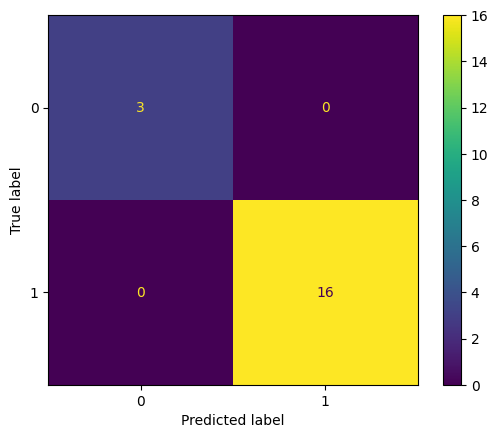

In [68]:
predicted = basic_model.predict(X_test)

predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()